# Classification Methods

*Complementing Logistic Regression*

---
Loyola University Chicago  
COMP 379-001/479-001, Spring 2025, Machine Learning  
Instructor: Daniel Moreira (dmoreira1@luc.edu)  
More at https://danielmoreira.github.io/teaching/ml_spr25/

---

Practical examples and exercises about multiple classification methods, such as KNN, Decision Trees, and SVM.

Language: Python 3  

Needed libraries:
* NumPy (https://numpy.org/)
* Scikit-learn (https://scikit-learn.org/)
* matplotlib (https://matplotlib.org/)
* PyDotPlus (https://pydotplus.readthedocs.io/)
* Python Imaging Library, PIL (https://python-pillow.org/)
* MLXtend (https://rasbt.github.io/mlxtend/)

In [ ]:
# imported libraries
import numpy as np
print('NumPy version', np.__version__)

import matplotlib
print('Matplotlib version', matplotlib.__version__)

import sklearn
print('SciKit version', sklearn.__version__)

import pydotplus
print('Check PyDotPlus import.')

import PIL
print('PIL version', PIL.__version__)

import mlxtend
print('MLXtend version', mlxtend.__version__)

---
## Working Data Preparation

### Data Acquisition

In [ ]:
# loads the Iris dataset using the scikit-learn library
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True)

# dataset description
print(iris_dataset.DESCR)

### Binary Toy Case

In [ ]:
# binary toy case
# X: entire data
# y: virginica vs. not-virginica
X = iris_dataset.data.values
y = (iris_dataset.target_names[iris_dataset.target] == 'virginica').astype('float').reshape((len(X), 1))

print('Last 5 X:', X[-5:]) # last five samples
print('X shape:', X.shape)
print()

print('Last 5 y:', y[-5:]) # last five labels
print('y shape:', y.shape)

### Data Partition

In [ ]:
from sklearn.model_selection import train_test_split

# split configuration
test_size = 0.2 # data percentage going to test
random_seed = 0 # save the seed for reproducibility

# data split
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# train info
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

# test info
print('Test data shape:', X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()

### 2D Toy Case with PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# data standardization
scaler = StandardScaler()

# norm data
norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.transform(X_test) # don't use "fit_transform" on the test partition

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 2D projection
pca = PCA(n_components=2)

X_train_2D = pca.fit_transform(norm_X_train)
X_test_2D = pca.transform(norm_X_test) # don't use "fit_transform" on the test partition

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w', label='virginica (train)')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w', label='not virginica (train)')

# test data plot
pos_X_test_2D = X_test_2D[np.array([y_test == 1.0]).flatten()]
neg_X_test_2D = X_test_2D[np.array([y_test == 0.0]).flatten()]
plt.scatter(pos_X_test_2D[:, 0], pos_X_test_2D[:, 1],
            c='r', label='virginica (test)')
plt.scatter(neg_X_test_2D[:, 0], neg_X_test_2D[:, 1],
            c='b', label='not virginica (test)')

plt.legend()
plt.show()


---
## KNN

### Train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# KNN classifier configuration
n = 3           # 3 neighbors
d = 'minkowski' # minkowski distance
p = 2           # power of 2 in minkowski distance (a.k.a, euclidean distance)
algo = 'brute'  # brute force sample comparison

# KNN training
knn = KNeighborsClassifier(n_neighbors=n, metric=d, p=p, algorithm=algo)
knn.fit(X_train_2D, y_train.ravel())

print('Model:', knn) # this is the model!

In [ ]:
# train-validation partition analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    knn, X_train_2D, y_train.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 50), # 50 classifiers from 10% to full train partition
    scoring = 'balanced_accuracy')

# accuracies
train_acc = train_scores.mean(axis=1)
valid_acc = valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_acc, 'r-', label='train')
plt.plot(train_sizes, valid_acc, 'b-', label='validation')
plt.ylim([0, 1.1])
plt.yticks(ticks=np.linspace(0.0, 1.0, 11))
plt.legend()
plt.grid()
plt.show()

### Test

In [ ]:
# KNN test
predictions = knn.predict(X_test_2D)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

In [ ]:
import matplotlib.pyplot as plt
# plotting predictions

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w')

# test data plot, with predictions
# labels (ground truth) and predicted labels
pos_test_labels = np.array(y_test == 1.0).flatten()
neg_test_labels = np.array(y_test == 0.0).flatten()
pos_pred_labels = np.array(predictions == 1.0).flatten()
neg_pred_labels = np.array(predictions == 0.0).flatten()

# true positive, true negatives, false positives, and false negative
tps = X_test_2D[np.array([pos_test_labels & pos_pred_labels]).flatten()]
tns = X_test_2D[np.array([neg_test_labels & neg_pred_labels]).flatten()]
fns = X_test_2D[np.array([pos_test_labels & neg_pred_labels]).flatten()]
fps = X_test_2D[np.array([neg_test_labels & pos_pred_labels]).flatten()]

# plotting everything
plt.scatter(tps[:, 0], tps[:, 1],
            c='r', label='virginica (hit)')
plt.scatter(tns[:, 0], tns[:, 1],
            c='b', label='not virginica (hit)')
plt.scatter(fns[:, 0], fns[:, 1],
            c='r', marker='x', label='virginica (miss)')
plt.scatter(fps[:, 0], fps[:, 1],
            c='b', marker='x', label='not virginica (miss)')
plt.title('KNN')
plt.legend()
plt.show()

# summary
print('True positives:', len(tps))
print('True negatives:', len(tns))
print('False positives:', len(fps))
print('False negatives:', len(fns))

In [ ]:
from mlxtend.plotting import plot_decision_regions

# graphically rich representation
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=knn)
plt.show()

### Metric Collection

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

In [ ]:
# precision, recall, and F-score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions)
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

---
## Decision Trees

### Train

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# decision tree configuration
min_split = 5   # split a node only if there are at least 5 samples inside it
random_seed = 0 # rand number gen seed to keep node splitting deterministic
                # this implementation resolves split ties randomly

# decision tree training
tree = DecisionTreeClassifier(min_samples_split=min_split,
                              random_state=random_seed)
tree.fit(X_train_2D, y_train.ravel())

# draws the decision tree model
tree_img_file = 'tree.png'
tree_data = export_graphviz(tree, filled=True, rounded=True,
                            class_names=['virginica', 'not virginica'],
                            out_file=None)
tree_graph = graph_from_dot_data(tree_data)
tree_graph.write_png(tree_img_file)
tree_img = np.asarray(Image.open(tree_img_file))
img_plot = plt.imshow(tree_img)

In [ ]:
# train-validation partition analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    tree, X_train_2D, y_train.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 50),
    scoring = 'balanced_accuracy')

# accuracies
train_acc = train_scores.mean(axis=1)
valid_acc = valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_acc, 'r-', label='train')
plt.plot(train_sizes, valid_acc, 'b-', label='validation')
plt.ylim([0, 1.1])
plt.yticks(ticks=np.linspace(0.0, 1.0, 11))
plt.legend()
plt.grid()
plt.show()

### Test

In [ ]:
# decision tree test
predictions = tree.predict(X_test_2D)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

In [ ]:
import matplotlib.pyplot as plt
# plotting predictions

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w')

# test data plot, with predictions
# labels (ground truth) and predicted labels
pos_test_labels = np.array(y_test == 1.0).flatten()
neg_test_labels = np.array(y_test == 0.0).flatten()
pos_pred_labels = np.array(predictions == 1.0).flatten()
neg_pred_labels = np.array(predictions == 0.0).flatten()

# true positive, true negatives, false positives, and false negative
tps = X_test_2D[np.array([pos_test_labels & pos_pred_labels]).flatten()]
tns = X_test_2D[np.array([neg_test_labels & neg_pred_labels]).flatten()]
fns = X_test_2D[np.array([pos_test_labels & neg_pred_labels]).flatten()]
fps = X_test_2D[np.array([neg_test_labels & pos_pred_labels]).flatten()]

# plotting everything
plt.scatter(tps[:, 0], tps[:, 1],
            c='r', label='virginica (hit)')
plt.scatter(tns[:, 0], tns[:, 1],
            c='b', label='not virginica (hit)')
plt.scatter(fns[:, 0], fns[:, 1],
            c='r', marker='x', label='virginica (miss)')
plt.scatter(fps[:, 0], fps[:, 1],
            c='b', marker='x', label='not virginica (miss)')
plt.title('Decision Tree')
plt.legend()
plt.show()

# summary
print('True positives:', len(tps))
print('True negatives:', len(tns))
print('False positives:', len(fps))
print('False negatives:', len(fns))

In [ ]:
from mlxtend.plotting import plot_decision_regions

# graphically rich representation
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=tree)
plt.show()

### Metric Collection

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

In [ ]:
# precision, recall, and F-score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions)
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

---
## Support Vector Machines

### Linear Kernel

#### Train

In [ ]:
from sklearn.svm import SVC

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM classifier configuration
phi = 'linear' # linear SVM kernel, no complex kernel function
               # it will work only on linearly separable data

c = 1.0        # c hyper-param (weight of slack variables within soft margin)
               # small c, high bias, large regularization
               # large c, high variance, small regularization

# SVM training
svm = SVC(kernel=phi, C=c)
svm.fit(X_train_2D, y_train.ravel())

print('Model:', svm) # this is the model!

In [ ]:
# train-validation partition analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svm, X_train_2D, y_train.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 50),
    scoring = 'balanced_accuracy')

# accuracies
train_acc = train_scores.mean(axis=1)
valid_acc = valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_acc, 'r-', label='train')
plt.plot(train_sizes, valid_acc, 'b-', label='validation')
plt.ylim([0, 1.1])
plt.yticks(ticks=np.linspace(0.0, 1.0, 11))
plt.legend()
plt.grid()
plt.show()

#### Test

In [ ]:
# svm test
predictions = svm.predict(X_test_2D)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

In [ ]:
import matplotlib.pyplot as plt
# plotting predictions

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w')

# test data plot, with predictions
# labels (ground truth) and predicted labels
pos_test_labels = np.array(y_test == 1.0).flatten()
neg_test_labels = np.array(y_test == 0.0).flatten()
pos_pred_labels = np.array(predictions == 1.0).flatten()
neg_pred_labels = np.array(predictions == 0.0).flatten()

# true positive, true negatives, false positives, and false negative
tps = X_test_2D[np.array([pos_test_labels & pos_pred_labels]).flatten()]
tns = X_test_2D[np.array([neg_test_labels & neg_pred_labels]).flatten()]
fns = X_test_2D[np.array([pos_test_labels & neg_pred_labels]).flatten()]
fps = X_test_2D[np.array([neg_test_labels & pos_pred_labels]).flatten()]

# plotting everything
plt.scatter(tps[:, 0], tps[:, 1],
            c='r', label='virginica (hit)')
plt.scatter(tns[:, 0], tns[:, 1],
            c='b', label='not virginica (hit)')
plt.scatter(fns[:, 0], fns[:, 1],
            c='r', marker='x', label='virginica (miss)')
plt.scatter(fps[:, 0], fps[:, 1],
            c='b', marker='x', label='not virginica (miss)')
plt.title('Linear Kernel SVM')
plt.legend()
plt.show()

# summary
print('True positives:', len(tps))
print('True negatives:', len(tns))
print('False positives:', len(fps))
print('False negatives:', len(fns))

In [ ]:
from mlxtend.plotting import plot_decision_regions

# graphically rich representation
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=svm)
plt.show()

#### Metric Collection

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

In [ ]:
# precision, recall, and F-score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions)
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

### Polynomial Kernel

#### Train

In [ ]:
from sklearn.svm import SVC

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM classifier configuration
phi = 'poly'   # polynomial SVM kernel
phi_degree = 5 # polynom degree

c = 1.0        # c hyper-param (weight of slack variables within soft margin)
               # small c, high bias, large regularization
               # large c, high variance, small regularization

# SVM training
svm = SVC(kernel=phi, degree=phi_degree, C=c)
svm.fit(X_train_2D, y_train.ravel())

print('Model:', svm) # this is the model!

In [ ]:
# train-validation partition analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svm, X_train_2D, y_train.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 50),
    scoring = 'balanced_accuracy')

# accuracies
train_acc = train_scores.mean(axis=1)
valid_acc = valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_acc, 'r-', label='train')
plt.plot(train_sizes, valid_acc, 'b-', label='validation')
plt.ylim([0, 1.1])
plt.yticks(ticks=np.linspace(0.0, 1.0, 11))
plt.legend()
plt.grid()
plt.show()

#### Test

In [ ]:
# svm test
predictions = svm.predict(X_test_2D)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

In [ ]:
import matplotlib.pyplot as plt
# plotting predictions

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w')

# test data plot, with predictions
# labels (ground truth) and predicted labels
pos_test_labels = np.array(y_test == 1.0).flatten()
neg_test_labels = np.array(y_test == 0.0).flatten()
pos_pred_labels = np.array(predictions == 1.0).flatten()
neg_pred_labels = np.array(predictions == 0.0).flatten()

# true positive, true negatives, false positives, and false negative
tps = X_test_2D[np.array([pos_test_labels & pos_pred_labels]).flatten()]
tns = X_test_2D[np.array([neg_test_labels & neg_pred_labels]).flatten()]
fns = X_test_2D[np.array([pos_test_labels & neg_pred_labels]).flatten()]
fps = X_test_2D[np.array([neg_test_labels & pos_pred_labels]).flatten()]

# plotting everything
plt.scatter(tps[:, 0], tps[:, 1],
            c='r', label='virginica (hit)')
plt.scatter(tns[:, 0], tns[:, 1],
            c='b', label='not virginica (hit)')
plt.scatter(fns[:, 0], fns[:, 1],
            c='r', marker='x', label='virginica (miss)')
plt.scatter(fps[:, 0], fps[:, 1],
            c='b', marker='x', label='not virginica (miss)')
plt.title('Linear Kernel SVM')
plt.legend()
plt.show()

# summary
print('True positives:', len(tps))
print('True negatives:', len(tns))
print('False positives:', len(fps))
print('False negatives:', len(fns))

In [ ]:
from mlxtend.plotting import plot_decision_regions

# graphically rich representation
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=svm)
plt.show()

#### Metric Collection

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

In [ ]:
# precision, recall, and F-score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions)
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

### RBF Kernel

#### Train

In [ ]:
from sklearn.svm import SVC

# scikit learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM classifier configuration
phi = 'rbf'     # Radial Basis Function SVM kernel
phi_gamma = 0.1 # hyper-parameter of RBF kernel
                # (inverse of Gaussian standard deviation)

c = 1.0         # c hyper-param (weight of slack variables within soft margin)
                # small c, high bias, large regularization
                # large c, high variance, small regularization

# SVM training
svm = SVC(kernel=phi, gamma=phi_gamma, C=c)
svm.fit(X_train_2D, y_train.ravel())

print('Model:', svm) # this is the model!

In [ ]:
# train-validation partition analysis
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svm, X_train_2D, y_train.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 50),
    scoring = 'balanced_accuracy')

# accuracies
train_acc = train_scores.mean(axis=1)
valid_acc = valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_acc, 'r-', label='train')
plt.plot(train_sizes, valid_acc, 'b-', label='validation')
plt.ylim([0, 1.1])
plt.yticks(ticks=np.linspace(0.0, 1.0, 11))
plt.legend()
plt.grid()
plt.show()

#### Test

In [ ]:
# svm test
predictions = svm.predict(X_test_2D)
print('Predictions:', predictions)
print('Predictions\' shape:', predictions.shape)

In [ ]:
import matplotlib.pyplot as plt
# plotting predictions

# train data plot
pos_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()]
neg_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()]
plt.scatter(pos_X_train_2D[:, 0], pos_X_train_2D[:, 1],
            edgecolors='r', facecolors='w')
plt.scatter(neg_X_train_2D[:, 0], neg_X_train_2D[:, 1],
            edgecolors='b', facecolors='w')

# test data plot, with predictions
# labels (ground truth) and predicted labels
pos_test_labels = np.array(y_test == 1.0).flatten()
neg_test_labels = np.array(y_test == 0.0).flatten()
pos_pred_labels = np.array(predictions == 1.0).flatten()
neg_pred_labels = np.array(predictions == 0.0).flatten()

# true positive, true negatives, false positives, and false negative
tps = X_test_2D[np.array([pos_test_labels & pos_pred_labels]).flatten()]
tns = X_test_2D[np.array([neg_test_labels & neg_pred_labels]).flatten()]
fns = X_test_2D[np.array([pos_test_labels & neg_pred_labels]).flatten()]
fps = X_test_2D[np.array([neg_test_labels & pos_pred_labels]).flatten()]

# plotting everything
plt.scatter(tps[:, 0], tps[:, 1],
            c='r', label='virginica (hit)')
plt.scatter(tns[:, 0], tns[:, 1],
            c='b', label='not virginica (hit)')
plt.scatter(fns[:, 0], fns[:, 1],
            c='r', marker='x', label='virginica (miss)')
plt.scatter(fps[:, 0], fps[:, 1],
            c='b', marker='x', label='not virginica (miss)')
plt.title('Linear Kernel SVM')
plt.legend()
plt.show()

# summary
print('True positives:', len(tps))
print('True negatives:', len(tns))
print('False positives:', len(fps))
print('False negatives:', len(fns))

In [ ]:
from mlxtend.plotting import plot_decision_regions

# graphically rich representation
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=svm)
plt.show()

#### Metric Collection

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
bacc = balanced_accuracy_score(y_test, predictions)
print('Balance Accuracy:', bacc)

In [ ]:
# precision, recall, and F-score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

p = precision_score(y_test, predictions)
r = recall_score(y_test, predictions, )
f1 = fbeta_score(y_test, predictions, beta=1.0)

print('Precision:', p)
print('Recall:', r)
print('F1-score:', f1)

---
## Multilabel Classification

### Working Data Preparation

#### Data Acquisition

In [ ]:
# loads the Iris dataset using the scikit-learn library
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True)

# dataset description
print(iris_dataset.DESCR)

#### Multilabel Data

In [ ]:
# multilabel map
label_map = {'virginica': 0, 'versicolor': 1, 'setosa': 2}

# X (data) and y (labels)
X = iris_dataset.data.values
y = np.array([label_map[label]
              for label in iris_dataset.target_names[iris_dataset.target]]
             ).astype('float').reshape((len(X), 1))

print('Last 5 X:', X[-5:]) # last five samples
print('X shape:', X.shape)
print()

print('Last 5 y:', y[-5:]) # last five labels
print('y shape:', y.shape)

#### Data Partition

In [ ]:
from sklearn.model_selection import train_test_split

# split configuration
test_size = 0.2 # data percentage going to test
random_seed = 0 # save the seed for reproducibility

# data split
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# train info
print('Train data shape:', X_train.shape)
print('Train data labels, label count:', np.unique(y_train, return_counts=True))
print()

# test info
print('Test data shape:', X_test.shape)
print('Test data labels, label count:', np.unique(y_test, return_counts=True))
print()

#### 2D Toy Case with PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# data standardization
scaler = StandardScaler()

# norm data
norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.transform(X_test) # don't use "fit_transform" on the test partition

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 2D projection
pca = PCA(n_components=2)

X_train_2D = pca.fit_transform(norm_X_train)
X_test_2D = pca.transform(norm_X_test) # don't use "fit_transform" on the test partition

# train data plot
c0_X_train_2D = X_train_2D[np.array([y_train == 0.0]).flatten()] # virginica
c1_X_train_2D = X_train_2D[np.array([y_train == 1.0]).flatten()] # versicolor
c2_X_train_2D = X_train_2D[np.array([y_train == 2.0]).flatten()] # setosa

plt.scatter(c0_X_train_2D[:, 0], c0_X_train_2D[:, 1],
            edgecolors='r', facecolors='w', label='virginica (train)')
plt.scatter(c1_X_train_2D[:, 0], c1_X_train_2D[:, 1],
            edgecolors='b', facecolors='w', label='versicolor (train)')
plt.scatter(c2_X_train_2D[:, 0], c2_X_train_2D[:, 1],
            edgecolors='g', facecolors='w', label='setosa (train)')

# test data plot
c0_X_test_2D = X_test_2D[np.array([y_test == 0.0]).flatten()] # virginica
c1_X_test_2D = X_test_2D[np.array([y_test == 1.0]).flatten()] # versicolor
c2_X_test_2D = X_test_2D[np.array([y_test == 2.0]).flatten()] # setosa
plt.scatter(c0_X_test_2D[:, 0], c0_X_test_2D[:, 1],
            c='r', label='virginica (test)')
plt.scatter(c1_X_test_2D[:, 0], c1_X_test_2D[:, 1],
            c='b', label='versicolor (test)')
plt.scatter(c2_X_test_2D[:, 0], c2_X_test_2D[:, 1],
            c='g', label='versicolor (test)')

plt.legend()
plt.show()


### Activity

Train, test, and report metrics for three multilabel classifiers over the data given above.
Build the following classifiers:
1. KNN
2. Decision Tree
3. SVM (one-vs-all approach, see an example [here](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html))

Set the respective methods' hyper-parameters with any value you like.

In [30]:
# data load for building classifiers
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_dataset = load_iris(as_frame=True)
# print(iris_dataset.DESCR)

# multiclass label map
label_map = {'virginica': 0, 'versicolor': 1, 'setosa': 2}

X = iris_dataset.data.values
y = np.array([label_map[label]
              for label in iris_dataset.target_names[iris_dataset.target]]
             ).astype('float').reshape((len(X), 1))

print('Last 5 X:', X[-5:])
print('X shape:', X.shape)
# last 5 samples above

print('Last 5 y:', y[-5:])
print('y shape:', y.shape)
# last 5 labels above


# splitting data
test_size = 0.25 # test
random_seed = 0 # seed

X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y)

# train set
print('Train data shape:', X_train.shape)
print('Train data labels and count:', np.unique(y_train, return_counts=True))

# test set
print('Test data shape:', X_test.shape)
print('Test data labels and count:', np.unique(y_test, return_counts=True))
print()

# standardizing data
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train) # impt only on train set
X_test_standard = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_standard)
X_test_2D = pca.transform(X_test_standard)

print('PCA explained variance:', pca.explained_variance_ratio_)
# variance bc of pca
print('PCA variance Sum: ', sum(pca.explained_variance_ratio_))

Last 5 X: [[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
X shape: (150, 4)
Last 5 y: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y shape: (150, 1)
Train data shape: (112, 4)
Train data labels and count: (array([0., 1., 2.]), array([37, 37, 38]))
Test data shape: (38, 4)
Test data labels and count: (array([0., 1., 2.]), array([13, 13, 12]))

PCA explained variance: [0.74135563 0.22012957]
PCA variance Sum:  0.9614851989548796


Predictions: [0. 0. 0. 0. 1. 1. 1. 0. 1. 2. 2. 2. 1. 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 0.
 2. 0. 0. 1. 2. 1. 0. 0. 2. 2. 1. 1. 2. 2.]
Predictions' shape: (38,)
(38, 2)
(38, 1)
(38,)


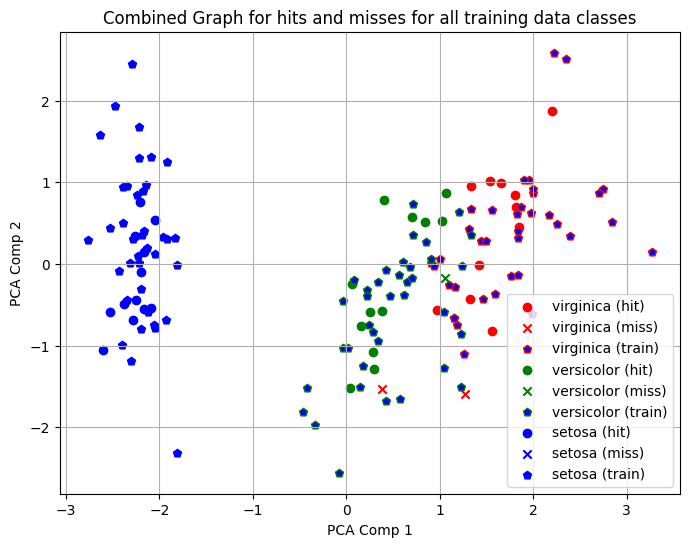

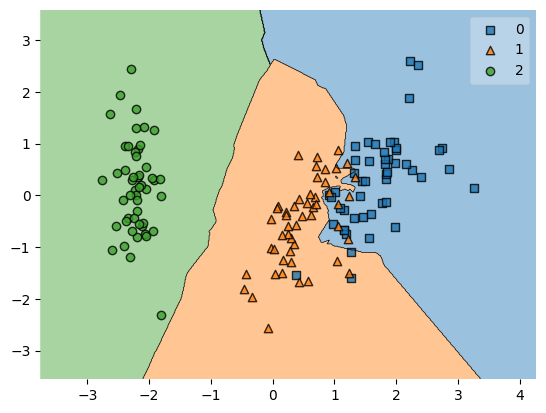

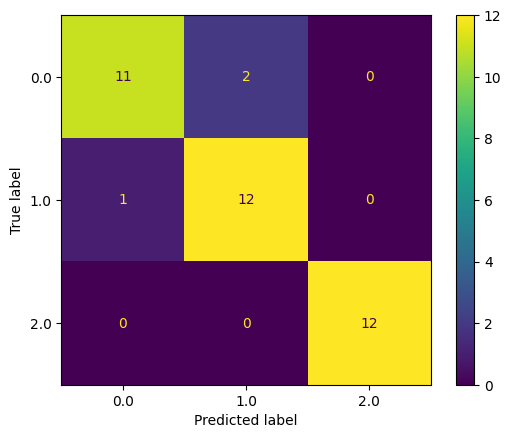

Balance Accuracy: 0.923076923076923
precision of knn: 0.9226190476190477
recall of knn: 0.9210526315789473
F1-score of knn: 0.9209356725146198
Cross-validation scores: [0.95652174 0.91304348 0.95454545 0.77272727 0.95454545]


In [29]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# KNN training using PCA(n=2)
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2, algorithm='brute')
knn.fit(X_train_2D, y_train.ravel())

# print('Model:', knn)

# knn testing with PCA (2)
y_knn_prediction = knn.predict(X_test_2D)
print('Predictions:', y_knn_prediction)
print('Predictions\' shape:', y_knn_prediction.shape)

print(X_test_2D.shape)
print(y_test.shape)
print(y_knn_prediction.shape)

# class labels context
class_labels = ['virginica', 'versicolor', 'setosa']
colors = ['r', 'g', 'b']

# combined plot fig
plt.figure(figsize=(8, 6))

for i, label in enumerate(class_labels): # calculating hits/misses
    hits = (y_test[:, 0] == i) & (y_knn_prediction == i)
    misses = (y_test[:, 0] == i) & (y_knn_prediction != i)

    plt.scatter(X_test_2D[hits, 0], X_test_2D[hits, 1], c=colors[i], marker='o', label=f'{label} (hit)')
    # fig for hits above
    plt.scatter(X_test_2D[misses, 0], X_test_2D[misses, 1], c=colors[i], marker='x', label=f'{label} (miss)')
    # figu for misses above

    train_points = (y_train[:, 0] == i) # training pts for current classifier
    plt.scatter(X_train_2D[train_points, 0], X_train_2D[train_points, 1], edgecolors=colors[i],
                facecolors='b', label=f'{label} (train)', marker='p')

plt.title('Combined Graph for hits and misses for all training data classes')
plt.xlabel('PCA Comp 1')
plt.ylabel('PCA Comp 2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# decision regions
X_combined = np.array(list(X_train_2D) + list(X_test_2D))
y_combined = np.array(list(y_train) + list(y_test), dtype=np.int32).ravel()

plot_decision_regions(X_combined, y_combined, clf=knn)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test, y_knn_prediction, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
balanced = balanced_accuracy_score(y_test, y_knn_prediction)
print('Balance Accuracy:', balanced)

# various metrics
precision = precision_score(y_test, y_knn_prediction, average='weighted')
recall = recall_score(y_test, y_knn_prediction, average='weighted')
f1_weighted = f1_score(y_test, y_knn_prediction, average='weighted')
# all metrics above weighted by num of true values per class
print('precision of knn:', precision)
print('recall of knn:', recall)
print('F1-score of knn:', f1_weighted)

# Cross validation
scores = cross_val_score(knn, X_train_2D, y_train.ravel(), cv=5)
print("Cross-validation scores:", scores)

Predictions' shape: (38,)
Predictions: [0. 0. 0. 0. 1. 1. 1. 0. 1. 2. 2. 2. 1. 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 0.
 2. 0. 0. 1. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2.]
(38, 2)
(38, 1)
(38,)


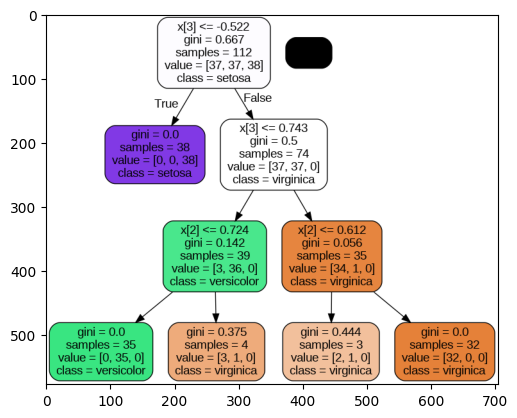

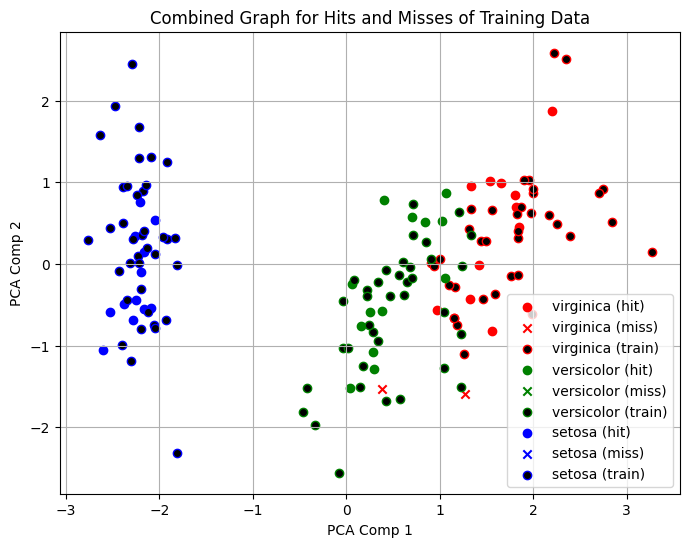

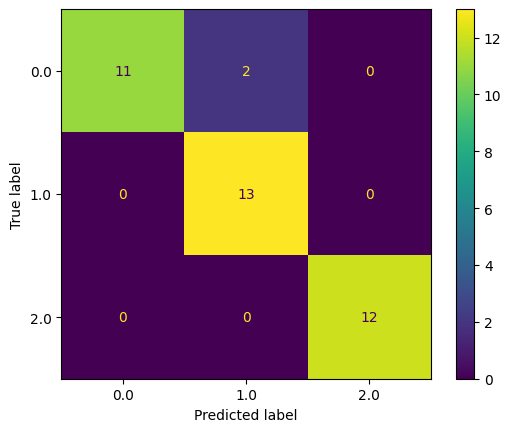

Balance Accuracy: 0.9487179487179488
precision decision tree class: 0.9543859649122807
recall decision tree class: 0.9473684210526315
f1-score decision tree class: 0.9470551378446116
Cross-validation scores: [0.95652174 1.         0.95454545 0.77272727 1.        ]


In [28]:
# DECISION TREE CLASSIFIER

from PIL import Image
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score

random_seed = 0
tree = DecisionTreeClassifier(random_state=random_seed, min_samples_split=5)
# decided on min of 5 nodes splitted for tree
tree.fit(X_train_standard, y_train.ravel())

# drawing tree model
tree_img_file = 'tree.png'
tree_data = export_graphviz(tree, filled=True, rounded=True, class_names=['virginica', 'versicolor', 'setosa'], out_file=None)
tree_graph = graph_from_dot_data(tree_data)
tree_graph.write_png(tree_img_file)
tree_img = np.asarray(Image.open(tree_img_file))
img_plot = plt.imshow(tree_img)

# tree testing
y_tree_prediction = tree.predict(X_test_standard)
print('Predictions\' shape:', y_tree_prediction.shape)
print('Predictions:', y_tree_prediction)
print(X_test_2D.shape)
print(y_test.shape)
print(y_tree_prediction.shape)

class_labels = ['virginica', 'versicolor', 'setosa']
colors = ['r', 'g', 'b']

plt.figure(figsize=(8, 6))

for i, label in enumerate(class_labels): # calculate hits and misses
    hits = (y_test[:, 0] == i) & (y_tree_prediction == i)
    misses = (y_test[:, 0] == i) & (y_tree_prediction != i)

    plt.scatter(X_test_2D[hits, 0], X_test_2D[hits, 1], c=colors[i], marker='o', label=f'{label} (hit)')
    # hits fig
    plt.scatter(X_test_2D[misses, 0], X_test_2D[misses, 1], c=colors[i], marker='x', label=f'{label} (miss)')
    # misses fig

    train_points = (y_train[:, 0] == i)
    plt.scatter(X_train_2D[train_points, 0], X_train_2D[train_points, 1], edgecolors=colors[i],
                facecolors='black', label=f'{label} (train)', marker='o')

plt.title('Combined Graph for Hits and Misses of Training Data')
plt.xlabel('PCA Comp 1')
plt.ylabel('PCA Comp 2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test, y_tree_prediction, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

# balanced accuracy
balanced = balanced_accuracy_score(y_test, y_tree_prediction)
print('Balance Accuracy:', balanced)

# metrics
precision = precision_score(y_test, y_tree_prediction, average='weighted')
recall = recall_score(y_test, y_tree_prediction, average='weighted')
f1_weighted = f1_score(y_test, y_tree_prediction, average='weighted')
print('precision decision tree class:', precision)
print('recall decision tree class:', recall)
print('f1-score decision tree class:', f1_weighted)

# cross validating
scores = cross_val_score(tree, X_train_standard, y_train.ravel(), cv=5)
print("Cross-validation scores:", scores)


Best hyperparameters: {'estimator__C': 0.85, 'estimator__gamma': 1}
Model: OneVsRestClassifier(estimator=SVC(C=0.85, gamma=1))
Predictions: [0. 0. 0. 0. 1. 1. 1. 0. 1. 2. 2. 2. 1. 2. 1. 0. 0. 2. 1. 1. 2. 1. 1. 0.
 2. 0. 0. 1. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2.]
Predictions' shape: (38,)
(38, 2)
(38, 1)
(38,)


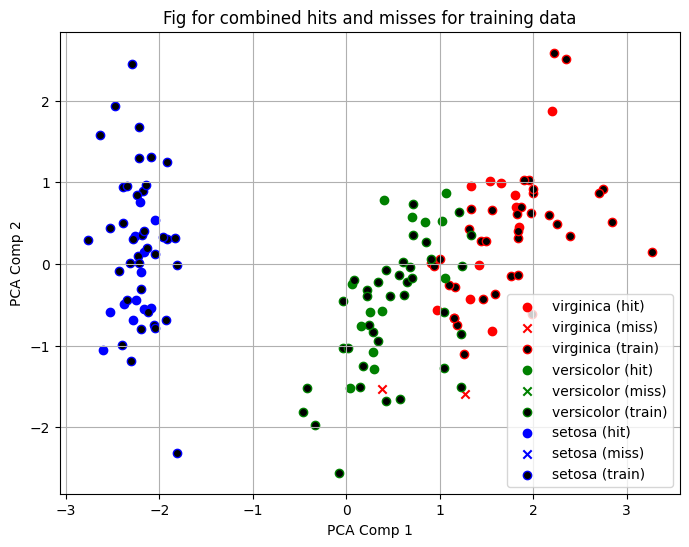

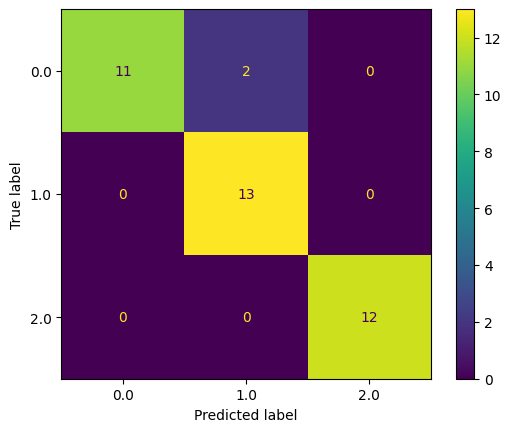

Balance Accuracy: 0.9487179487179488
precision for decision tree class: 0.9543859649122807
recall for decision tree class: 0.9473684210526315
f1-score for decision tree class: 0.9470551378446116
Cross-validation scores: [0.95652174 1.         0.90909091 0.90909091 1.        ]


In [27]:
# SVM Classifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
param_grid = {
    'estimator__C': [0.7, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.85, 0.9],
    'estimator__gamma': [0.001, 0.01, 0.1, 1, 1.05, 1.1]
}

svm = SVC(kernel='rbf') # main svm class model

#onvVSRest scikit method
svm_one_rest = OneVsRestClassifier(svm)

grid_search = GridSearchCV(svm_one_rest, param_grid, cv=5, scoring='accuracy')
# grid search with 5-fold for hyperparam tuning
grid_search.fit(X_train_standard, y_train.ravel())
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train selected OvR model with best params
svm_best_ovr = OneVsRestClassifier(SVC(kernel='rbf',
                                       C=best_params['estimator__C'],
                                       gamma=best_params['estimator__gamma']))
svm_best_ovr.fit(X_train_standard, y_train.ravel())

y_svm_predictions = svm_best_ovr.predict(X_test_standard)
print("Model:", svm_best_ovr)
print('Predictions:', y_svm_predictions)
print('Predictions\' shape:', y_svm_predictions.shape)
print(X_test_2D.shape)
print(y_test.shape)
print(y_svm_predictions.shape)

class_labels = ['virginica', 'versicolor', 'setosa']
colors = ['r', 'g', 'b']

plt.figure(figsize=(8, 6))

for i, label in enumerate(class_labels): # finding hits and misses
    hits = (y_test[:, 0] == i) & (y_svm_predictions == i)
    misses = (y_test[:, 0] == i) & (y_svm_predictions != i)

    plt.scatter(X_test_2D[hits, 0], X_test_2D[hits, 1], c=colors[i], marker='o', label=f'{label} (hit)')
    # hits fig

    plt.scatter(X_test_2D[misses, 0], X_test_2D[misses, 1], c=colors[i], marker='x', label=f'{label} (miss)')
    # misses fig

    train_points = (y_train[:, 0] == i)
    plt.scatter(X_train_2D[train_points, 0], X_train_2D[train_points, 1], edgecolors=colors[i],
                facecolors='black', label=f'{label} (train)', marker='o')

plt.title('Fig for combined hits and misses for training data')
plt.xlabel('PCA Comp 1')
plt.ylabel('PCA Comp 2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_svm_predictions, labels=svm_best_ovr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_best_ovr.classes_)
disp.plot()
plt.show()

# balanced accuracy
balanced = balanced_accuracy_score(y_test, y_svm_predictions)
print('Balance Accuracy:', balanced)

#metrics
precision = precision_score(y_test, y_svm_predictions, average='weighted')
recall  = recall_score(y_test, y_svm_predictions, average='weighted')
f1_weighted = f1_score(y_test, y_svm_predictions, average='weighted')
print('precision for decision tree class:', precision)
print('recall for decision tree class:', recall)
print('f1-score for decision tree class:', f1_weighted)

# Cross validation
scores = cross_val_score(svm, X_train_standard, y_train.ravel(), cv=5)
print("Cross-validation scores:", scores)